# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
#setting the criteria for the API call
url = "https://api.openweathermap.org/data/2.5/weather?q="
demo_url = url + "London" + "&appid=" + weather_api_key
#print(demo_url)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

print("Beginning Data Retrieval")
print("")
print("-----------------------------")

city_name = []
temp = []
feels_like = []
temp_min = []
temp_max = []
pressure = []
humidity = []
lat = []
lon = []
visibility = []
wind_speed = []
cloud_cover = []
date = []
country = []


for city in cities:
    try:
        query_url = url + city + "&units=imperial" + "&appid=" + weather_api_key
        
        response = requests.get(query_url).json()
        
        city_name.append(response['name'])
        
        temp.append(response['main']['temp'])
        
        feels_like.append(response['main']['feels_like'])
        
        temp_min.append(response['main']['temp_min'])
        
        temp_max.append(response['main']['temp_max'])
        
        pressure.append(response['main']['pressure'])
        
        humidity.append(response['main']['humidity'])
        
        lat.append(response['coord']['lat'])
        
#        lon.append(response['coord']['lon'])
        
#        visibility.append(response['visibility'])
        
#        wind_speed.append(response['wind']['speed'])
        
#        cloud_cover.append(response['clouds']['all'])
        
#        date.append(response['dt'])
        
#        country.append(response['sys']['country'])
        
#        print(f'Processing Record {city}')
        
#        time.sleep(1)
        
#    except:
        
#        print('City not found, moving on...')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#city_data = {
#    'City Name':city_name,
#    'Lat':lat,
#    'Lon':lon,
#    'Max Temperature':temp_max,
#    'Humidity':humidity,
#    'Cloudiness':cloud_cover,
#    'Wind Speed':wind_speed,
#    'Country':country,
#    'Date':date
#}

#city_df = pd.DataFrame(city_data)
#city_df

In [6]:
#city_df.to_csv('city_data.csv')

In [7]:
#city_df.describe()

In [11]:
#Reloading city data from CSV to make further edits easier
city_data_path = "city_data.csv"
city_df = pd.read_csv(city_data_path)
city_df.describe()

,Unnamed: 0,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,276.000000,19.093421,13.532452,52.173580,73.226040,50.229656,7.856420,1.614299e+09
std,159.781622,33.162701,91.682655,29.743648,19.818321,38.278296,5.732659,2.461688e+02
min,0.000000,-54.800000,-179.166700,-36.400000,3.000000,0.000000,0.070000,1.614298e+09
25%,138.000000,-8.008900,-66.100000,37.900000,65.000000,7.000000,3.870000,1.614298e+09
50%,276.000000,22.566700,14.022900,62.650000,78.000000,54.000000,6.260000,1.614299e+09
75%,414.000000,45.410000,95.321400,75.630000,88.000000,90.000000,10.560000,1.614299e+09
max,552.000000,78.218600,179.316700,91.810000,100.000000,100.000000,32.210000,1.614299e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_cleaned_df = city_df.loc[city_df['Humidity'] < 100]
city_cleaned_df

,Unnamed: 0,City Name,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Busselton,-33.6500,115.3333,66.99,73,45,3.00,AU,1614298115
1,1,Bubaque,11.2833,-15.8333,76.62,69,0,14.88,GW,1614298148
2,2,Jamestown,42.0970,-79.2353,26.60,63,1,4.61,US,1614298127
3,3,Atuona,-9.8000,-139.0333,80.33,79,3,12.24,PF,1614298151
4,4,Hobart,-42.8794,147.3294,63.00,82,75,14.97,AU,1614298092
...,...,...,...,...,...,...,...,...,...,...
548,548,Kanigoro,-8.1300,112.2190,77.22,80,92,6.26,ID,1614298900
549,549,Worthington,40.0931,-83.0180,37.00,64,1,4.61,US,1614298901
550,550,Ulverstone,-41.1500,146.1667,66.00,52,4,3.00,AU,1614298903
551,551,Fougamou,-1.2154,10.5838,73.22,94,100,1.57,GA,1614298904


In [13]:
city_cleaned_df.describe()

,Unnamed: 0,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,274.359926,18.873791,13.847145,52.155009,72.530612,50.393321,7.889295,1.614299e+09
std,159.363757,33.291657,92.290940,30.016795,19.592040,38.328763,5.713297,2.463103e+02
min,0.000000,-54.800000,-179.166700,-36.400000,3.000000,0.000000,0.070000,1.614298e+09
25%,137.500000,-8.137500,-66.728500,37.650000,64.000000,6.500000,3.870000,1.614298e+09
50%,275.000000,22.075200,13.503100,63.000000,77.000000,54.000000,6.290000,1.614299e+09
75%,411.500000,45.363350,97.453850,75.975000,87.000000,90.000000,10.645000,1.614299e+09
max,552.000000,78.218600,179.316700,91.810000,99.000000,100.000000,32.210000,1.614299e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.
#Uneeded step

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#This was done above

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

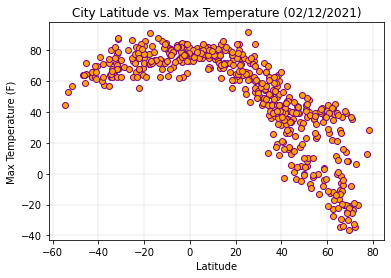

In [14]:
city_lat = city_cleaned_df['Lat']
city_max_temp = city_cleaned_df['Max Temperature']

plt.scatter(city_lat,city_max_temp, facecolors='orange', edgecolors='purple')
plt.title('City Latitude vs. Max Temperature (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(linestyle='-',linewidth=.25)
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

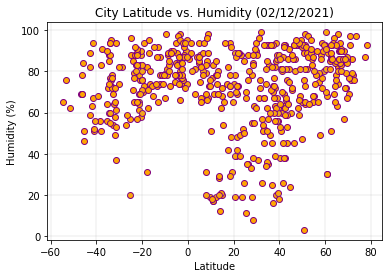

In [15]:
city_lat = city_cleaned_df['Lat']
city_max_humidity = city_cleaned_df['Humidity']

plt.scatter(city_lat,city_max_humidity, facecolors='orange', edgecolors='purple')
plt.title('City Latitude vs. Humidity (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='-',linewidth=.25)
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

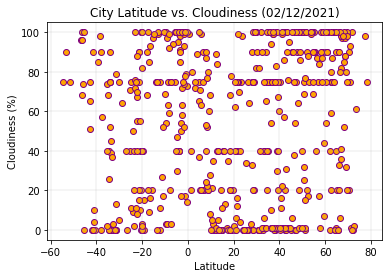

In [16]:
city_lat = city_cleaned_df['Lat']
city_max_cloudiness = city_cleaned_df['Cloudiness']

plt.scatter(city_lat,city_max_cloudiness, facecolors='orange', edgecolors='purple')
plt.title('City Latitude vs. Cloudiness (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='-',linewidth=.25)
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

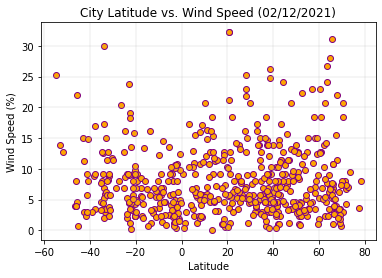

In [17]:
city_lat = city_cleaned_df['Lat']
city_max_windspeed = city_cleaned_df['Wind Speed']

plt.scatter(city_lat,city_max_windspeed, facecolors='orange', edgecolors='purple')
plt.title('City Latitude vs. Wind Speed (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid(linestyle='-',linewidth=.25)
plt.show

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is 0.7239885066538633


<function matplotlib.pyplot.show(*args, **kw)>

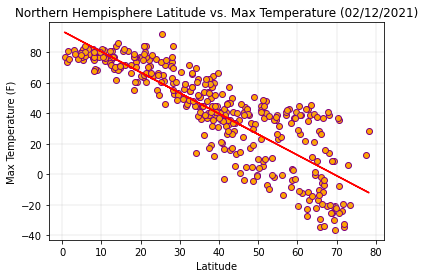

In [43]:
northern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] >= 0]

city_northern_lat = northern_hemisphere_df['Lat']
city_northern_max_temp = northern_hemisphere_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(city_northern_lat, city_northern_max_temp)
correlation = st.pearsonr(city_northern_lat,city_northern_max_temp)

print(f'The R Value is {rvalue**2}')

plt.scatter(city_northern_lat,city_northern_max_temp, facecolors='orange', edgecolors='purple')
plt.title('Northern Hempisphere Latitude vs. Max Temperature (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
regress_values = city_northern_lat * slope + intercept
plt.plot(city_northern_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
plt.show



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is 0.3333350821984411


<function matplotlib.pyplot.show(*args, **kw)>

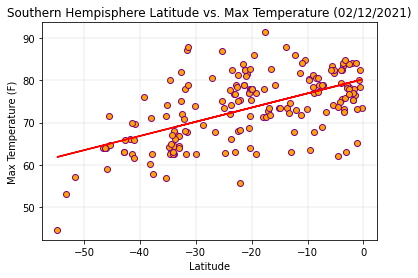

In [44]:
southern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] <= 0]

city_southern_lat = southern_hemisphere_df['Lat']
city_southern_max_temp = southern_hemisphere_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(city_southern_lat, city_southern_max_temp)
correlation = st.pearsonr(city_southern_lat,city_southern_max_temp)

print(f'The R Value is {rvalue**2}')

plt.scatter(city_southern_lat,city_southern_max_temp, facecolors='orange', edgecolors='purple')
plt.title('Southern Hempisphere Latitude vs. Max Temperature (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
regress_values = city_southern_lat * slope + intercept
plt.plot(city_southern_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.0019158747861713027


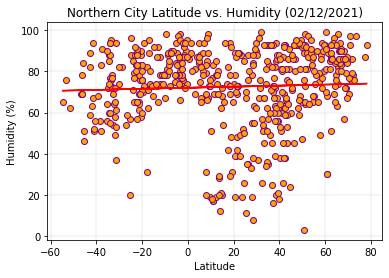

In [58]:
northern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] >= 0]

northern_city_lat = city_cleaned_df['Lat']
northern_city_max_humidity = city_cleaned_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_city_lat, northern_city_max_humidity)
correlation = st.pearsonr(northern_city_lat,northern_city_max_humidity)

print(f'The R Value is {rvalue**2}')

plt.scatter(northern_city_lat,northern_city_max_humidity, facecolors='orange', edgecolors='purple')
plt.title('Northern City Latitude vs. Humidity (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
regress_values = northern_city_lat * slope + intercept
plt.plot(northern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.16421687417226327


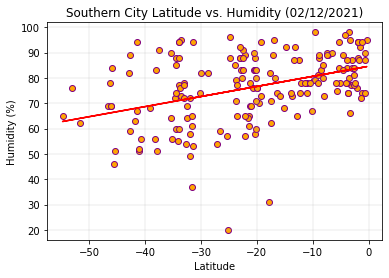

In [48]:
southern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] <= 0]

southern_city_lat = southern_hemisphere_df['Lat']
southern_city_max_humidity = southern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_city_lat, southern_city_max_humidity)
correlation = st.pearsonr(city_southern_lat,city_southern_max_temp)

print(f'The R Value is {rvalue**2}')

plt.scatter(southern_city_lat,southern_city_max_humidity, facecolors='orange', edgecolors='purple')
plt.title('Southern City Latitude vs. Humidity (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
regress_values = southern_city_lat * slope + intercept
plt.plot(southern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.06608744390149288


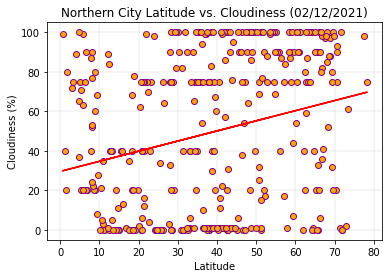

In [57]:
northern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] >= 0]

northern_city_lat = northern_hemisphere_df['Lat']
northern_city_max_cloudiness = northern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_city_lat, northern_city_max_cloudiness)
correlation = st.pearsonr(northern_city_lat,northern_city_max_cloudiness)

print(f'The R Value is {rvalue**2}')

plt.scatter(northern_city_lat,northern_city_max_cloudiness, facecolors='orange', edgecolors='purple')
plt.title('Northern City Latitude vs. Cloudiness (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
regress_values = northern_city_lat * slope + intercept
plt.plot(northern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.05779451643799698


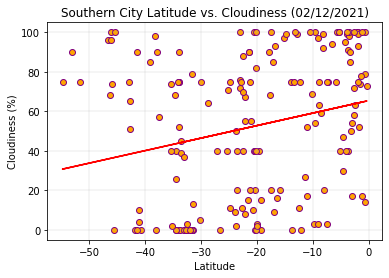

In [56]:
southern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] <= 0]

southern_city_lat = southern_hemisphere_df['Lat']
southern_city_max_cloudiness = southern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_city_lat, southern_city_max_cloudiness)
correlation = st.pearsonr(southern_city_lat,southern_city_max_cloudiness)

print(f'The R Value is {rvalue**2}')

plt.scatter(southern_city_lat,southern_city_max_cloudiness, facecolors='orange', edgecolors='purple')
plt.title('Southern City Latitude vs. Cloudiness (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
regress_values = southern_city_lat * slope + intercept
plt.plot(southern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is 6.502092194007372e-05


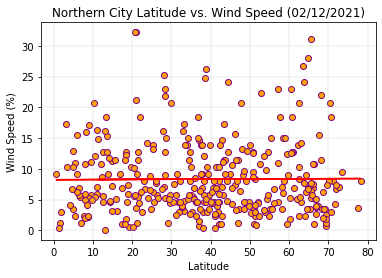

In [55]:
northern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] >= 0]

northern_city_lat = northern_hemisphere_df['Lat']
northern_city_max_windspeed = northern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_city_lat, northern_city_max_windspeed)
correlation = st.pearsonr(northern_city_lat,northern_city_max_windspeed)

print(f'The R Value is {rvalue**2}')

plt.scatter(northern_city_lat,northern_city_max_windspeed, facecolors='orange', edgecolors='purple')
plt.title('Northern City Latitude vs. Wind Speed (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
regress_values = northern_city_lat * slope + intercept
plt.plot(northern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is 0.07703509786139782


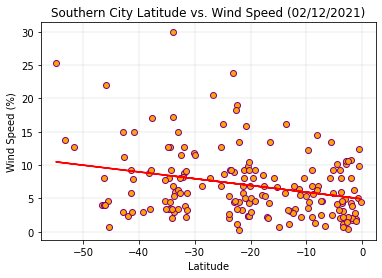

In [69]:
southern_hemisphere_df = city_cleaned_df[city_cleaned_df['Lat'] <= 0]

southern_city_lat = southern_hemisphere_df['Lat']
southern_city_max_windspeed = southern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_city_lat, southern_city_max_windspeed)
correlation = st.pearsonr(southern_city_lat,southern_city_max_windspeed)

print(f'The R Value is {rvalue**2}')

plt.scatter(southern_city_lat,southern_city_max_windspeed, facecolors='orange', edgecolors='purple')
plt.title('Southern City Latitude vs. Wind Speed (02/12/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
regress_values = southern_city_lat * slope + intercept
plt.plot(southern_city_lat,regress_values,"r-")
plt.grid(linestyle='-',linewidth=.25)
plt.show()